In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
from sklearn.preprocessing import MinMaxScaler
data = pd.read_csv('Banknote-authentication-dataset-.csv')
data

V1        V2
0     3.62160   8.66610
1     4.54590   8.16740
2     3.86600  -2.63830
3     3.45660   9.52280
4     0.32924  -4.45520
...       ...       ...
1367  0.40614   1.34920
1368 -1.38870  -4.87730
1369 -3.75030 -13.45860
1370 -3.56370  -8.38270
1371 -2.54190  -0.65804

[1372 rows x 2 columns]

In [3]:
import matplotlib.patches as patches

In [4]:
obj_norm = MinMaxScaler().fit(data)

In [5]:
norm_data = obj_norm.transform(data)
norm_data = pd.DataFrame(norm_data)
norm_data.describe()

0            1
count  1372.000000  1372.000000
mean      0.539114     0.587301
std       0.205003     0.219611
min       0.000000     0.000000
25%       0.379977     0.451451
50%       0.543617     0.602168
75%       0.711304     0.770363
max       1.000000     1.000000

In [6]:
column1 = norm_data[0]
column2 = norm_data[1]
x_mean = np.mean(column1)
y_mean = np.mean(column2)

In [7]:
mean = np.array([[x_mean],[y_mean]])
std_dev1 = np.std(column1)
std_dev2 = np.std(column2)
print(std_dev1, std_dev2)

0.2049287443629144 0.21953127587108526


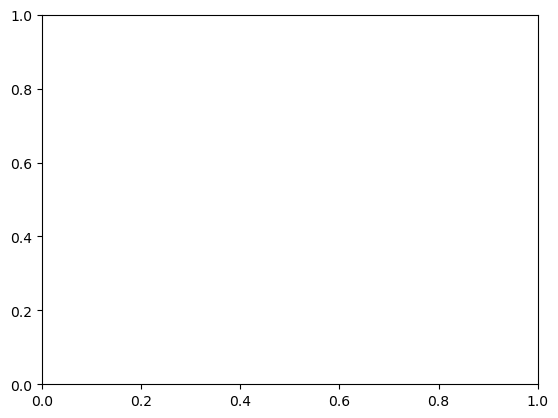

In [17]:
ellipse = patches.Ellipse((x_mean,y_mean),std_dev1*2,std_dev2*2, alpha = 0.25)
fig,graph = plt.subplots()


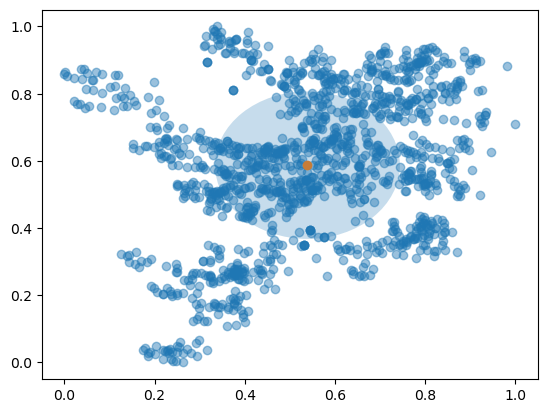

In [18]:
fig,graph = plt.subplots()
graph.scatter(column1, column2, alpha = 0.45)
graph.scatter(x_mean, y_mean)
graph.add_patch(ellipse)







In [49]:
from sklearn.cluster import KMeans
import numpy as np
V1_V2 = np.column_stack((column1, column2))

kmeans = KMeans(n_clusters= 2)

label = kmeans.fit_predict(V1_V2)

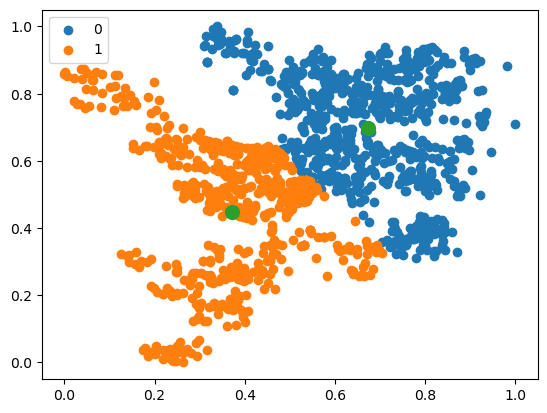

In [50]:
#Getting the Centroids
cluster = km_res.cluster_centers_
u_labels = np.unique(label)

#plotting the results:
for i in u_labels:
    plt.scatter(V1_V2[label == i , 0] , V1_V2[label == i , 1] , label = i)
plt.scatter(cluster[:,0], cluster[:,1],s=100)
plt.legend()
plt.show()

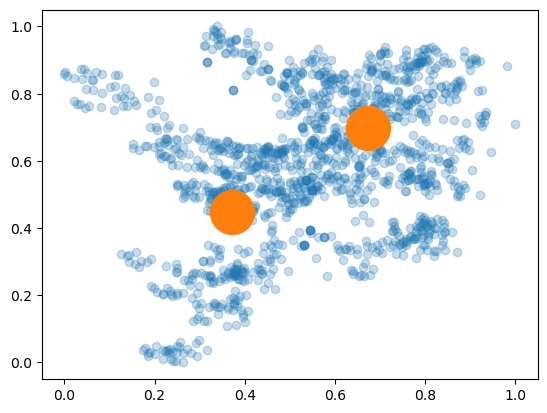

In [52]:
cluster = km_res.cluster_centers_
plt.scatter(column1,column2, alpha = 0.25)
plt.scatter(cluster[:,0], cluster[:,1],s=1000)